# Weather Predictions

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

### Import Data

I found this dataset on kaggle - https://www.kaggle.com/code/esraameslamsayed/eda-for-weather-dataset-for-beginners/log
It does not state any descriptive factors about where this data is from or when it was captured.

I took a random sample of 3000 values from the dataset as it was over 8000.

In [2]:
raw_data = pd.read_csv('Weather Data.csv')

# Select a random sample of 3000 rows
# random_state for reproducibility
sample_data = raw_data.sample(n=3000, random_state=42)  
data = sample_data.copy()

In [3]:
data = data.reset_index(drop=True)
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,9/23/2012 1:00,12.8,9.6,81,17,25.0,100.46,Mostly Cloudy
1,3/3/2012 0:00,1.0,-3.2,73,22,25.0,100.12,Cloudy
2,9/29/2012 11:00,12.6,9.8,83,24,24.1,101.19,Cloudy
3,5/11/2012 9:00,11.7,1.6,50,19,48.3,100.63,Mainly Clear
4,1/21/2012 16:00,-11.6,-18.8,55,7,48.3,102.11,Clear


## Preprocessing

### Exploring the descriptive statistics of the variables

In [4]:
data.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,8.584600,2.260300,67.001667,15.299000,27.755300,101.060323
std,11.890596,11.108932,16.927685,8.872307,12.669205,0.845050
min,-21.100000,-26.800000,18.000000,0.000000,0.200000,97.640000
25%,-0.300000,-6.100000,56.000000,9.000000,24.100000,100.550000
50%,9.200000,2.700000,68.000000,15.000000,25.000000,101.090000
75%,18.700000,11.700000,81.000000,20.000000,25.000000,101.580000
max,33.000000,23.200000,100.000000,70.000000,48.300000,103.650000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         3000 non-null   object 
 1   Temp_C            3000 non-null   float64
 2   Dew Point Temp_C  3000 non-null   float64
 3   Rel Hum_%         3000 non-null   int64  
 4   Wind Speed_km/h   3000 non-null   int64  
 5   Visibility_km     3000 non-null   float64
 6   Press_kPa         3000 non-null   float64
 7   Weather           3000 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 187.6+ KB


In [6]:
data.groupby('Weather').mean()

C:\Users\LE732\AppData\Local\Temp\ipykernel_31712\3094402736.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Weather').mean()


,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather,,,,,,
Clear,6.682993,-0.253515,63.746032,10.122449,29.791610,101.629048
Cloudy,7.970470,2.556879,70.109060,16.011745,26.805705,100.935336
Drizzle,7.570588,5.511765,87.058824,16.294118,17.464706,100.245294
"Drizzle,Fog",9.148276,8.086207,93.103448,12.310345,5.448276,100.761724
"Drizzle,Snow",0.900000,0.200000,95.000000,19.000000,11.300000,100.630000
"Drizzle,Snow,Fog",0.775000,0.025000,94.750000,20.000000,6.825000,98.890000
Fog,4.476471,3.260784,91.784314,8.372549,6.139216,101.096863
Freezing Drizzle,-4.866667,-6.800000,86.333333,18.666667,9.133333,100.560000
"Freezing Drizzle,Fog",-1.100000,-2.550000,90.000000,26.000000,6.000000,99.645000


In [7]:
#unique values of weather & count
data['Weather'].value_counts()

Mostly Cloudy                     721
Mainly Clear                      714
Cloudy                            596
Clear                             441
Snow                              143
Rain                               86
Rain Showers                       65
Fog                                51
Rain,Fog                           44
Drizzle,Fog                        29
Snow Showers                       20
Drizzle                            17
Snow,Fog                            8
Snow,Blowing Snow                   7
Rain,Snow                           7
Freezing Rain                       6
Freezing Drizzle,Snow               5
Thunderstorms,Rain Showers          4
Drizzle,Snow,Fog                    4
Snow,Haze                           3
Freezing Drizzle                    3
Haze                                3
Freezing Drizzle,Haze               2
Freezing Drizzle,Fog                2
Rain,Snow,Ice Pellets               2
Moderate Snow                       2
Freezing Rai

## Visuals

Text(0.5, 0, 'Weather Conditions')

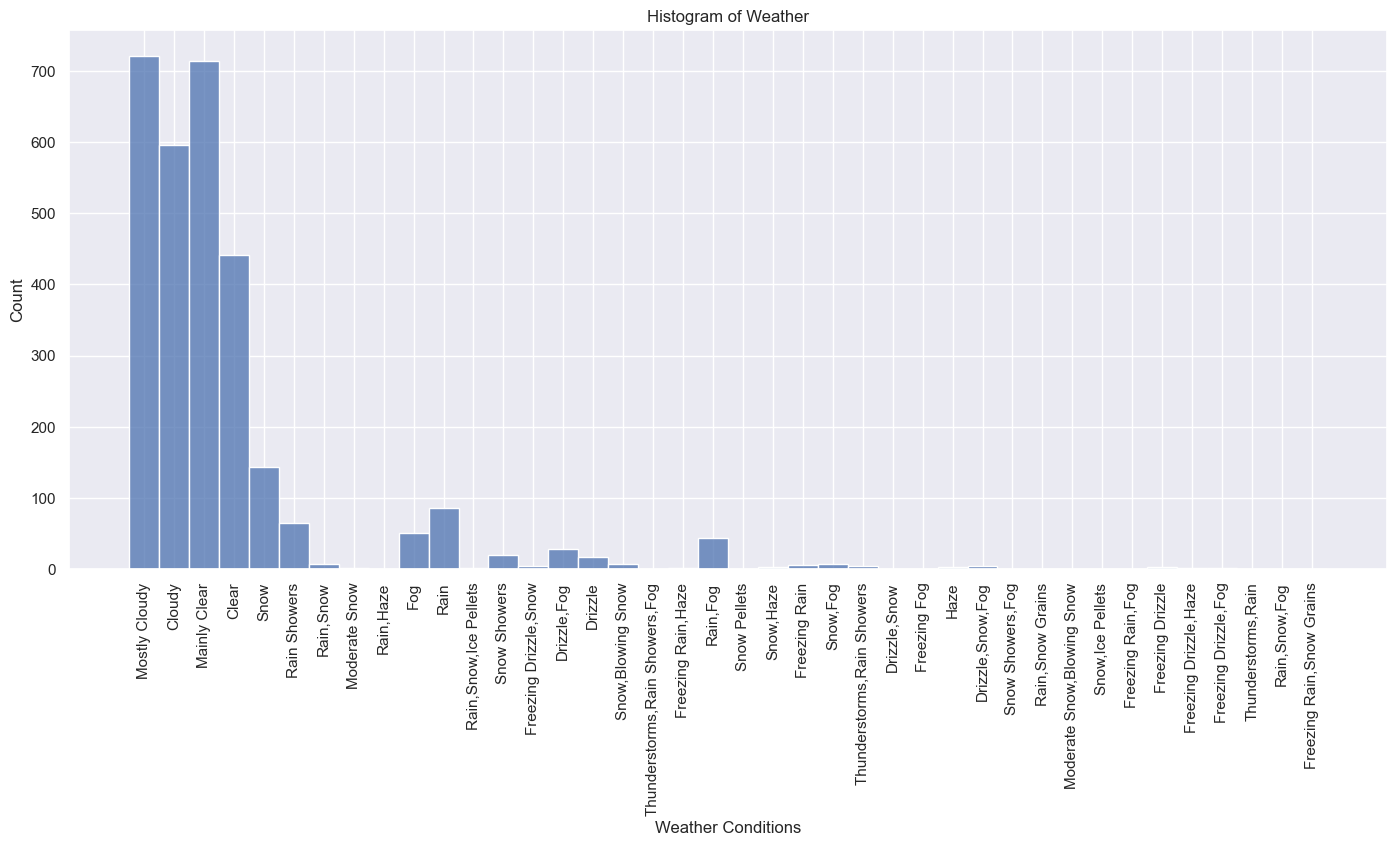

In [8]:
weather = data['Weather']

plt.figure(figsize=(17, 7))
sns.histplot(weather) 
#plt.hist(weather) 
plt.xticks(rotation=90)
plt.title('Histogram of Weather')
plt.xlabel('Weather Conditions')

## Categorical Clusters
---

In [9]:
# Rearrange columns
data = data[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Visibility_km', 'Press_kPa',
             'Wind Speed_km/h','Weather','Date/Time']]
data

,Temp_C,Dew Point Temp_C,Rel Hum_%,Visibility_km,Press_kPa,Wind Speed_km/h,Weather,Date/Time
0,12.8,9.6,81,25.0,100.46,17,Mostly Cloudy,9/23/2012 1:00
1,1.0,-3.2,73,25.0,100.12,22,Cloudy,3/3/2012 0:00
2,12.6,9.8,83,24.1,101.19,24,Cloudy,9/29/2012 11:00
3,11.7,1.6,50,48.3,100.63,19,Mainly Clear,5/11/2012 9:00
4,-11.6,-18.8,55,48.3,102.11,7,Clear,1/21/2012 16:00
...,...,...,...,...,...,...,...,...
2995,-4.6,-10.0,66,25.0,101.85,13,Clear,11/26/2012 20:00
2996,-12.7,-20.4,53,24.1,101.68,17,Cloudy,1/11/2012 12:00
2997,12.6,9.7,82,25.0,101.31,6,Clear,5/24/2012 2:00
2998,17.3,8.9,58,48.3,100.65,22,Mainly Clear,9/9/2012 12:00


### Select the Features

In [10]:
x = data.iloc[:,0:6]
x.head(10)

,Temp_C,Dew Point Temp_C,Rel Hum_%,Visibility_km,Press_kPa,Wind Speed_km/h
0,12.8,9.6,81,25.0,100.46,17
1,1.0,-3.2,73,25.0,100.12,22
2,12.6,9.8,83,24.1,101.19,24
3,11.7,1.6,50,48.3,100.63,19
4,-11.6,-18.8,55,48.3,102.11,7
5,21.1,17.3,79,24.1,100.66,11
6,-9.6,-12.6,79,9.7,100.42,6
7,19.6,10.5,56,48.3,100.04,24
8,24.2,10.6,42,19.3,101.54,22
9,-15.2,-20.6,63,25.0,100.60,24


### Standardize the Variables

In [11]:
# Import a library which can do that easily
from sklearn import preprocessing
# Scale the inputs
# preprocessing.scale scales each variable (column in x) with respect to itself
# The new result is an array
x_scaled = preprocessing.scale(x)
x_scaled

array([[ 0.35457456,  0.6608127 ,  0.82708694, -0.21751636, -0.71051838,
         0.1917521 ],
       [-0.63797178, -0.49160533,  0.35440956, -0.21751636, -1.1129286 ,
         0.75539731],
       [ 0.33775174,  0.67881924,  0.94525628, -0.2885666 ,  0.15348005,
         0.98085539],
       ...,
       [ 0.33775174,  0.66981597,  0.88617161, -0.21751636,  0.29550719,
        -1.04826736],
       [ 0.733088  ,  0.59778984, -0.53186052,  1.62189538, -0.48564207,
         0.75539731],
       [-0.43609794, -0.20350082,  0.64983292, -0.2885666 ,  1.25419037,
         0.75539731]])

### Clustering

Manually choosing numbers of clusters

In [12]:
# Object kmeans with a total of 4 clusters
kmeans = KMeans(4, n_init='auto')

In [13]:
# Fit the input data, i.e. cluster the data in X in K clusters
kmeans.fit(x_scaled)

KMeans(n_clusters=4, n_init='auto')

### Clustering the Results

In [14]:
# Create a variable containing the predicted clusters for each observation
identified_clusters = kmeans.fit_predict(x_scaled)
# Check the result
identified_clusters

array([1, 0, 1, ..., 1, 3, 2])

In [15]:
weather_data = data.iloc[:,0:7]
# Create a copy of the data
data_with_clusters = weather_data.copy()
# Create a new Series, containing the identified cluster for each observation
data_with_clusters['Cluster'] = identified_clusters
# Check the result
data_with_clusters.head(20)

,Temp_C,Dew Point Temp_C,Rel Hum_%,Visibility_km,Press_kPa,Wind Speed_km/h,Weather,Cluster
0,12.8,9.6,81,25.0,100.46,17,Mostly Cloudy,1
1,1.0,-3.2,73,25.0,100.12,22,Cloudy,0
2,12.6,9.8,83,24.1,101.19,24,Cloudy,1
3,11.7,1.6,50,48.3,100.63,19,Mainly Clear,3
4,-11.6,-18.8,55,48.3,102.11,7,Clear,2
5,21.1,17.3,79,24.1,100.66,11,Mostly Cloudy,1
6,-9.6,-12.6,79,9.7,100.42,6,Snow,2
7,19.6,10.5,56,48.3,100.04,24,Mostly Cloudy,3
8,24.2,10.6,42,19.3,101.54,22,Mainly Clear,3
9,-15.2,-20.6,63,25.0,100.60,24,Cloudy,2


# Selecting the Number of Clusters with WCSS

Within-cluster sum of squares WCSS is a measure used within the ANOVA framework. It helps evaluate the variation both between clusters and within clusters, offering a useful guideline for determining the optimal number of clusters.

### Elbow with Standardized Variables

In [16]:
# Use the ingerated <i>sklearn</i> method <i> 'inertia_' </i>
kmeans.inertia_

8788.192562823819

In [17]:
# Create an empty list
wcss=[]

# Create all possible cluster solutions with a loop
for i in range(1,12):
    # Cluster solution with i clusters
    kmeans = KMeans(i, n_init='auto')
    # Fit the data
    kmeans.fit(x_scaled)
    # Find WCSS for the current iteration
    wcss_iter = kmeans.inertia_
    # Append the value to the WCSS list
    wcss.append(wcss_iter)
wcss

[18000.0,
 13396.590080524838,
 10687.157583825565,
 8787.963888438613,
 8065.683902523562,
 7511.572744012249,
 7079.075553566723,
 6546.481326069346,
 6155.70323758801,
 5950.406391253034,
 5639.994756232949]

#### Plot The Elbow

Text(0, 0.5, 'Within-cluster Sum of Squares')

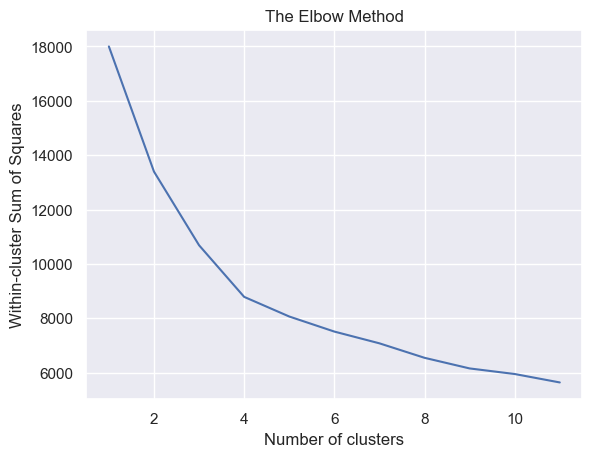

In [18]:
# A variable containing the numbers from 1 to 8, to use it as X axis of the future plot
number_clusters = range(1,12)
# Plot the number of clusters vs WCSS
plt.plot(number_clusters,wcss)
# Name your graph
plt.title('The Elbow Method')
# Name the x-axis
plt.xlabel('Number of clusters')
# Name the y-axis
plt.ylabel('Within-cluster Sum of Squares')

In [19]:
# Fiddle with K (the number of clusters)
kmeans_new = KMeans(4, n_init='auto')
# Fit the data
kmeans_new.fit(x_scaled)
# Create a new data frame with the predicted clusters
clusters_new = weather_data.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
# includes the original values & predictions based on standardized data
# Convert entire data frame as string and print
print(clusters_new[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%','Visibility_km', 'Press_kPa', 'Weather',
       'cluster_pred']].to_string())

      Temp_C  Dew Point Temp_C  Rel Hum_%  Visibility_km  Press_kPa                         Weather  cluster_pred
0       12.8               9.6         81           25.0     100.46                   Mostly Cloudy             1
1        1.0              -3.2         73           25.0     100.12                          Cloudy             3
2       12.6               9.8         83           24.1     101.19                          Cloudy             1
3       11.7               1.6         50           48.3     100.63                    Mainly Clear             2
4      -11.6             -18.8         55           48.3     102.11                           Clear             0
5       21.1              17.3         79           24.1     100.66                   Mostly Cloudy             1
6       -9.6             -12.6         79            9.7     100.42                            Snow             0
7       19.6              10.5         56           48.3     100.04                   Mo

In all, this dataset is maybe not the best for clustering as is. There are way more data points pertaining to Cloudy, Clear, Mostly Cloudy, and Mostly Clear weather than other weather such as Snow, Rain, or Fog making it harder to predict the weather.